In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [594]:
 df = pd.read_csv('Placement_Data_Full_Class.csv')

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [596]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [597]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [598]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [599]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [600]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [601]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [602]:
df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [603]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [604]:
df.drop(['sl_no','salary'],axis=1,inplace=True)

In [605]:
cat_feats = df.select_dtypes(exclude=[np.number]).columns

In [606]:
cat_feats

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [607]:
dataset= pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [608]:
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,1,1,0,0,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,1,1,1,0,1,0,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,1,1,1,1,0,0,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,0,1,1,1,0,0,0,0,1,1


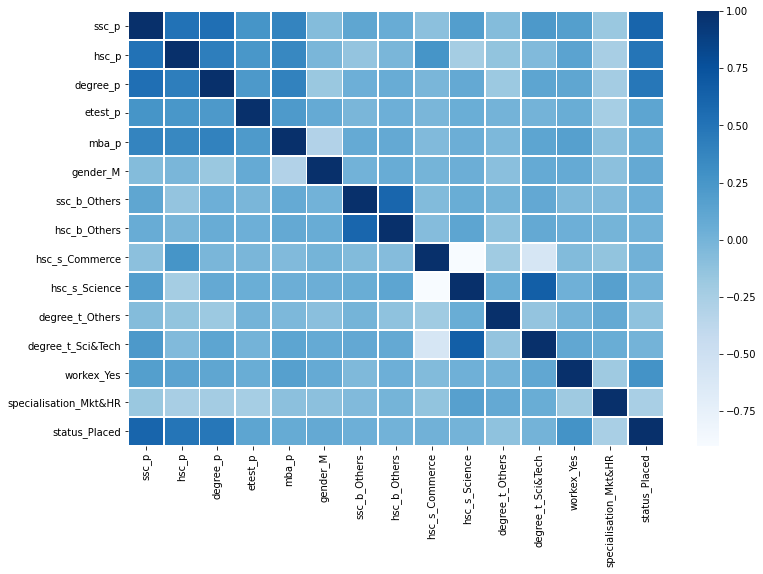

In [689]:
corr = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='Blues',lw=0.5)

In [696]:
print ('TOP 5 important features which impact the placements:\n',corr['status_Placed'].sort_values(ascending=False)[1:6], '\n') #top 5 values
#print (corr['status_Placed'].sort_values(ascending=False)[-5:], '\n') #bottom 5 values

TOP 5 important features to get placed are:
 ssc_p         0.607889
hsc_p         0.491228
degree_p      0.479861
workex_Yes    0.276060
etest_p       0.127639
Name: status_Placed, dtype: float64 



In [609]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [610]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [611]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Logistic Regression**

In [631]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [632]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 9  1]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.97      0.91      0.94        33

    accuracy                           0.91        43
   macro avg       0.86      0.90      0.88        43
weighted avg       0.92      0.91      0.91        43



In [653]:
classifier.coef_.shape

(1, 14)

In [657]:
dataset.columns[:-1].shape

(14,)

In [703]:
coeffecients = pd.DataFrame(classifier.coef_.reshape((14,1)),dataset.columns[:-1])
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values('Coeffecient',ascending=False)

,Coeffecient
ssc_p,2.014307
degree_p,1.176722
hsc_p,0.780648
workex_Yes,0.753581
gender_M,0.546087
hsc_b_Others,0.059895
ssc_b_Others,0.045526
etest_p,-0.027850
specialisation_Mkt&HR,-0.078831
degree_t_Others,-0.123878


# **KNN Classification**

In [614]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [615]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 6  4]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.89      0.94      0.91        33

    accuracy                           0.86        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.85      0.86      0.85        43



In [616]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

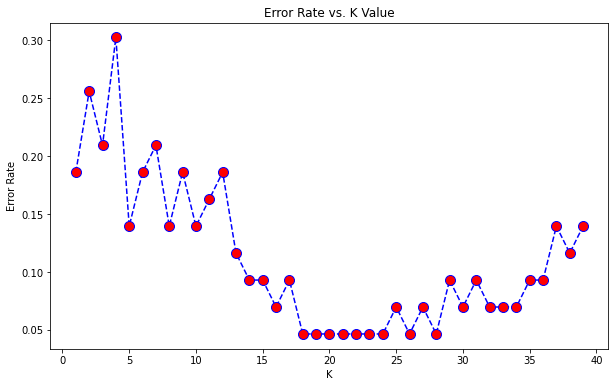

In [617]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [618]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 21)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [619]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 8  2]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        33

    accuracy                           0.95        43
   macro avg       0.97      0.90      0.93        43
weighted avg       0.96      0.95      0.95        43



# **Decision Tree Classification**

In [620]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [621]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 7  3]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.47      0.70      0.56        10
           1       0.89      0.76      0.82        33

    accuracy                           0.74        43
   macro avg       0.68      0.73      0.69        43
weighted avg       0.79      0.74      0.76        43



# **Random Forest Classification**

In [622]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [623]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 9  1]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.97      0.91      0.94        33

    accuracy                           0.91        43
   macro avg       0.86      0.90      0.88        43
weighted avg       0.92      0.91      0.91        43



# **SVM Classification**

In [624]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [625]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 9  1]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.97      0.91      0.94        33

    accuracy                           0.91        43
   macro avg       0.86      0.90      0.88        43
weighted avg       0.92      0.91      0.91        43



# **Kernel SVM Classification**

In [626]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [627]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 9  1]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        33

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43



# **Naive Bayes Classification**

In [628]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [629]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 8  2]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.94      0.94      0.94        33

    accuracy                           0.91        43
   macro avg       0.87      0.87      0.87        43
weighted avg       0.91      0.91      0.91        43



# **Conclusion**




Since the dataset is small, the there is a noticeable change in accuracy of the algorithms everytime we run the program.
In such a such case it is better to run all the algorithms considerable no.of.times (say 10 times) and find the mean accuracy of all the models.
Also cosider the accuracy range while choosing the best fit algorithm for your dataset. 

In my program i found Logistic regression and Kernel SVM classification as a best model to this dataset.
